In [17]:
# %matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [18]:
import numpy as np
import pandas as pd

In [19]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [20]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
#from sqlalchemy import func

In [21]:
# Create Engine
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [22]:
# reflect an existing database into a new model
station_df = pd.read_sql("SELECT * FROM Station", conn)
# reflect the tables
station_df

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [23]:
# reflect an existing database into a new model
measurement_df = pd.read_sql("SELECT * FROM Measurement", engine)
# reflect the tables
print(measurement_df.shape)
measurement_df.tail(1)

(19550, 5)


,id,station,date,prcp,tobs
19549,19550,USC00516128,2017-08-23,0.45,76.0


In [24]:
# We can view all of the classes that automap found
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [70]:
# Save references to table 'measurement' 
Measurement = Base.classes.measurement
# Create our session (link) from Python to the DB
session = Session(engine)
# Display the row's columns and data in dictionary format
first_row = session.query(Measurement).first()
first_row.__dict__
# Check database
Base.metadata.tables

immutabledict({'measurement': Table('measurement', MetaData(bind=None), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None), 'station': Table('station', MetaData(bind=None), Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False), Column('station', TEXT(), table=<station>), Column('name', TEXT(), table=<station>), Column('latitude', FLOAT(), table=<station>), Column('longitude', FLOAT(), table=<station>), Column('elevation', FLOAT(), table=<station>), schema=None)})

In [26]:
# Save references to table 'station'
Station = Base.classes.station
# Create our session (link) from Python to the DB
session = Session(engine)
# Display the row's columns and data in dictionary format
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x11b2f34a6c8>,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 3.0,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1}

# Exploratory Climate Analysis

### Design a query to retrieve the last 12 months of precipitation data and plot the results
Calculate the date 1 year ago from the last data point in the database.<br>
Perform a query to retrieve the data and precipitation scores.<br>
Save the query results as a Pandas DataFrame and set the index to the date column.<br>
Sort the dataframe by date.<br>

In [ ]:
# Calculate the date 1 year ago from the last data point in the database.
MaxAge = session.query(func.max(Demographics.age)).first()
number = MaxAge[0]-7
number
#+ timedelta(days=1)
#- timedelta(seconds=60)

In [76]:
# Calculate the date 1 year ago from the last data point in the database.
MaxDate = session.query(func.max(Measurement.date)).first()
print(MaxDate)

('2017-08-23',)


In [75]:
aYearBefore = MaxDate-365
aYearBefore

TypeError: unsupported operand type(s) for -: 'result' and 'int'

In [67]:
# date = max (date) - 365

prcp_data = pd.read_sql("SELECT Measurement.date, Measurement.prcp FROM Measurement WHERE date > '2016-08-23'", conn)
prcp_data.sort_values(by="date", inplace=True)
prcp_data.set_index("date", inplace=True)
prcp_data

There are SELECT max(measurement.tobs) AS max_1 
FROM measurement Weather Stations


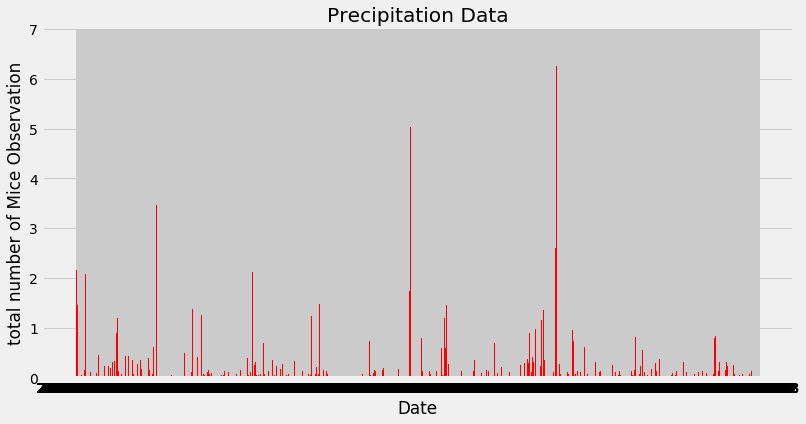

In [68]:
# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize=(12, 6)) 

x_axis = np.arange(len(prcp_data))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, prcp_data.index.tolist())


plt.bar(x_axis, prcp_data["prcp"], color="r",
        align="center", width=.7, bottom=None)

plt.title("Precipitation Data")
plt.xlabel("Date")
plt.ylabel("total number of Mice Observation")

#plt.savefig("../Images/Bar2.png")
plt.show()

In [37]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_data.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [30]:
# Design a query to show how many stations are available in this dataset?
NumberofStation = session.query(Station).count()
print(f"There are {NumberofStation} Weather Stations")

There are 9 Weather Stations


## !! DECENDING ORDER

In [31]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

for row in session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).all():
    print(row)

('USC00511918', 1979)
('USC00513117', 2709)
('USC00514830', 2202)
('USC00516128', 2612)
('USC00517948', 1372)
('USC00518838', 511)
('USC00519281', 2772)
('USC00519397', 2724)
('USC00519523', 2669)


In [53]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
for row in session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).group_by(Measurement.station).all():
    print(row)

('USC00511918', 53.0, 87.0, 71.61596766043456)
('USC00513117', 59.0, 85.0, 72.68918420081211)
('USC00514830', 58.0, 85.0, 74.8732970027248)
('USC00516128', 58.0, 84.0, 70.91500765696784)
('USC00517948', 58.0, 87.0, 74.68440233236151)
('USC00518838', 58.0, 83.0, 72.72407045009784)
('USC00519281', 54.0, 85.0, 71.66378066378067)
('USC00519397', 56.0, 87.0, 74.55323054331865)
('USC00519523', 56.0, 85.0, 74.5436493068565)


In [51]:
# Choose the station with the highest number of temperature observations.
MaxTemp = session.query(Measurement.prcp).max()
MaxTemp
#HotStation = session.query(Measurement.station, func.min(Measurement.prcp))
#print(f"There are {HotStation} Weather Stations")

AttributeError: 'Query' object has no attribute 'max'

In [56]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
prcp_data1 = pd.read_sql("SELECT Measurement.date, Measurement.prcp FROM Measurement WHERE (Measurement.date > '2016-08-23' and Measurement.station == 'USC00519523' )", conn)
prcp_data1.sort_values(by="date", inplace=True)
prcp_data1.set_index("date", inplace=True)
prcp_data1

,prcp
date,
2016-08-24,1.22
2016-08-25,0.21
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.14
...,...
2017-08-17,0.05
2017-08-19,NaN
2017-08-21,NaN


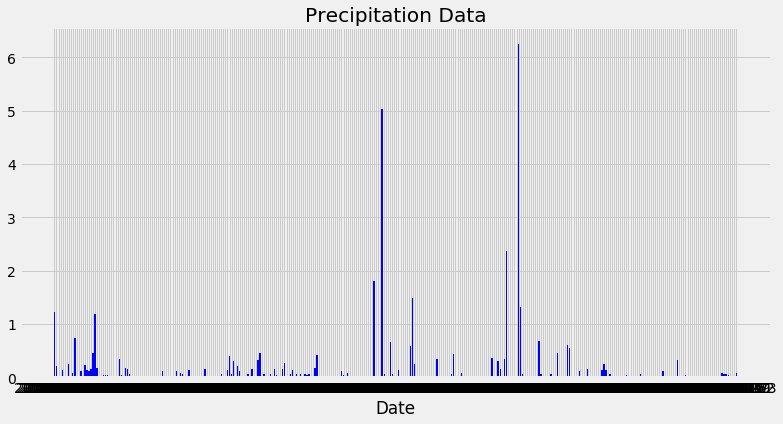

In [47]:
# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize=(12, 6)) 

x_axis = np.arange(len(prcp_data1))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, prcp_data1.index.tolist())


plt.bar(x_axis, prcp_data1["prcp"], color="b",
        align="center", width=.7, bottom=None)

plt.title("Precipitation Data")
plt.xlabel("Date")
#plt.ylabel("total number of Mice Observation")

#plt.savefig("../Images/Bar2.png")
plt.show()

## Bonus Challenge Assignment

In [48]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [35]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
